# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [63]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [64]:
# Your code here - Manipulate column names
problems = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),('+','plus'), ('½','half'), ('-','_')]
for problem in problems:
    df.columns=[col.replace(problem[0],problem[1]) for col in df.columns]
df.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10plus', 'ages_10_14',
       'ages_10_16', 'ages_10_21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very_Challenging',
       'review_difficulty_Very_Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)

In [65]:
# Your code here - Define the target and predictors
target='list_price'
predictors=[str(x) for x in df.columns if x!='list_price']

In [66]:
# Your code here - Split into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.2) 

In [67]:
train.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
5463,-0.501602,15.7990,-0.398512,0.216064,-0.045687,1.244458,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8207,-0.173165,67.0878,-0.342657,0.738870,0.990651,0.117830,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7771,-0.596644,4.8678,-0.091306,-0.132473,0.576116,-0.365010,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4619,-0.531679,12.0000,-0.370585,-0.132473,0.368848,1.244458,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5084,-0.253771,48.7878,-0.147162,0.913138,0.368848,0.600671,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [68]:
# Your code here - Fit the actual model
from statsmodels.formula.api import ols
predictor_str = '+'.join(predictors)
formula = target + '~' + predictor_str
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     582.5
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:25:15   Log-Likelihood:                -43009.
No. Observations:                8696   AIC:                         8.621e+04
Df Residuals:                    8601   BIC:                         8.688e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                        -5.224e+12   2.21e+13     -0.236      0.814   -4.86e+13    3.82e+13
piece_count                                         76.8318      0.864     88.907      0.000      75.138      78.526
num_reviews                                          6.6484      0.651     10.213      0.000       5.372       7.924
play_star_rating                                     4.5691      0.589      7.752      0.000       3.414       5.724
star_rating                                         -0.7956      0.670     -1.188      0.235      -2.108       0.517
val_star_rating                                     -8.2667      0.605    -13.667      0.000      -9.452      -7.081
ages_10plus                                      -5.011e+10   2.12e+11     -0.236      0.814   -4.66e+11    3.66e+11
ages_10_14                                       -5.011e+10   2.12e+11     -0.236      0.814   -4.66e+11    3.66e+11
ages_10_16                                       -5.011e+10   2.12e+11     -0.236      0.814   -4.66e+11    3.66e+11
ages_10_21                                       -5.011e+10   2.12e+11     -0.236      0.814   -4.66e+11    3.66e+11
ages_11_16                                       -5.011e+10   2.12e+11     -0.236      0.814   -4.66e+11    3.66e+11
ages_12plus                                      -5.011e+10   2.12e+11     -0.236      0.814   -4.66e+11    3.66e+11
ages_12_16                                       -5.011e+10   2.12e+11     -0.236      0.814   -4.66e+11    3.66e+11
ages_14plus                                      -5.011e+10   2.12e+11     -0.236      0.814   -4.66e+11    3.66e+11
ages_16plus                                      -5.011e+10   2.12e+11     -0.236      0.814   -4.66e+11    3.66e+11
ages_1half_3                                     -3.187e+11   1.35e+12     -0.236      0.814   -2.97e+12    2.33e+12
ages_1half_5                                     -3.187e+11   1.35e+12     -0.236      0.814   -2.97e+12    2.33e+12
ages_2_5                                         -3.187e+11   1.35e+12     -0.236      0.814   -2.97e+12    2.33e+12
ages_4plus                                       -4.598e+10   1.95e+11     -0.236      0.814   -4.28e+11    3.36e+11
ages_4_7                                         -2.461e+09   1.04e+10     -0.236      0.814   -2.29e+10     1.8e+10
ages_4_99                                        -4.598e+10   1.95e+11     -0.236      0.814   -4.28e+11    3.36e+11
ages_5plus                                       -1.621e+10   6.87e+10     -0.236      0.814   -1.51e+11    1.18e+11
ages_5_12                                        -5.011e+10   2.12e+11     -0.236      0.814   -4.66e+11    3.66e+11
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [69]:
# Your code here - Remove features which do not appear to be statistically relevant
influential=['list_price','piece_count','num_reviews','play_star_rating','star_rating','val_star_rating']
uninfluential=[x for x in train if x not in influential]
train.drop(uninfluential,axis=1,inplace=True)
train.head()

['ages_10plus', 'ages_10_14', 'ages_10_16', 'ages_10_21', 'ages_11_16', 'ages_12plus', 'ages_12_16', 'ages_14plus', 'ages_16plus', 'ages_1half_3', 'ages_1half_5', 'ages_2_5', 'ages_4plus', 'ages_4_7', 'ages_4_99', 'ages_5plus', 'ages_5_12', 'ages_5_8', 'ages_6plus', 'ages_6_12', 'ages_6_14', 'ages_7plus', 'ages_7_12', 'ages_7_14', 'ages_8plus', 'ages_8_12', 'ages_8_14', 'ages_9plus', 'ages_9_12', 'ages_9_14', 'ages_9_16', 'theme_name_Angry_Birds', 'theme_name_Architecture', 'theme_name_BOOST', 'theme_name_Blues_Helicopter_Pursuit', 'theme_name_BrickHeadz', 'theme_name_Carnotaurus_Gyrosphere_Escape', 'theme_name_City', 'theme_name_Classic', 'theme_name_Creator_3_in_1', 'theme_name_Creator_Expert', 'theme_name_DC_Comics_Super_Heroes', 'theme_name_DC_Super_Hero_Girls', 'theme_name_DIMENSIONS', 'theme_name_DUPLO', 'theme_name_Dilophosaurus_Outpost_Attack', 'theme_name_Disney', 'theme_name_Elves', 'theme_name_Friends', 'theme_name_Ghostbusters', 'theme_name_Ideas', 'theme_name_Indoraptor_Ra

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating
5463,-0.501602,15.7990,-0.398512,0.216064,-0.045687,1.244458
8207,-0.173165,67.0878,-0.342657,0.738870,0.990651,0.117830
7771,-0.596644,4.8678,-0.091306,-0.132473,0.576116,-0.365010
4619,-0.531679,12.0000,-0.370585,-0.132473,0.368848,1.244458
5084,-0.253771,48.7878,-0.147162,0.913138,0.368848,0.600671


In [70]:
# Your code here - Refit the model
inf_predictors=[x for x in influential if x!='list_price']
print(inf_predictors)
predictor_str = '+'.join(inf_predictors)
formula = target + '~' + predictor_str
model=ols(formula=formula,data=train).fit()
model.summary()

['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     5859.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:25:48   Log-Likelihood:                -45278.
No. Observations:                8696   AIC:                         9.057e+04
Df Residuals:                    8690   BIC:                         9.061e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           66.9352      0.474    141.291      0.000      66.007      67.864
piece_count         84.4440      0.580    145.525      0.000      83.307      85.581
num_reviews         -3.2095      0.573     -5.604      0.000      -4.332      -2.087
play_star_rating     6.9043      0.605     11.419      0.000       5.719       8.089
star_rating         -0.3150      0.771     -0.409      0.683      -1.825       1.195
val_star_rating    -13.1298      0.698    -18.811      0.000     -14.498     -11.762
==============================================================================
Omnibus:                     9437.079   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1203535.149
Skew:                           5.345   Prob(JB):                         0.00
Kurtosis:                      59.633   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [71]:
# Your code here - Continue to refine the model
influential=['list_price','piece_count','num_reviews','play_star_rating','val_star_rating']
uninfluential=[x for x in train if x not in influential]
train.drop(uninfluential,axis=1,inplace=True)
train.head()

,piece_count,list_price,num_reviews,play_star_rating,val_star_rating
5463,-0.501602,15.7990,-0.398512,0.216064,1.244458
8207,-0.173165,67.0878,-0.342657,0.738870,0.117830
7771,-0.596644,4.8678,-0.091306,-0.132473,-0.365010
4619,-0.531679,12.0000,-0.370585,-0.132473,1.244458
5084,-0.253771,48.7878,-0.147162,0.913138,0.600671


In [72]:
# Your code here - Refit the model
inf_predictors=[x for x in influential if x!='list_price']
print(inf_predictors)
predictor_str = '+'.join(inf_predictors)
formula = target + '~' + predictor_str
model=ols(formula=formula,data=train).fit()
model.summary()

['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     7324.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:29:42   Log-Likelihood:                -45278.
No. Observations:                8696   AIC:                         9.057e+04
Df Residuals:                    8691   BIC:                         9.060e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           66.9350      0.474    141.298      0.000      66.006      67.864
piece_count         84.4326      0.580    145.680      0.000      83.297      85.569
num_reviews         -3.2066      0.573     -5.600      0.000      -4.329      -2.084
play_star_rating     6.7960      0.544     12.504      0.000       5.731       7.861
val_star_rating    -13.3084      0.544    -24.445      0.000     -14.376     -12.241
==============================================================================
Omnibus:                     9436.521   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1203196.239
Skew:                           5.344   Prob(JB):                         0.00
Kurtosis:                      59.625   Cond. No.                         1.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [73]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = train[inf_predictors]
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
list(zip(inf_predictors, vif))

[('piece_count', 1.4407010984992485),
 ('num_reviews', 1.4436004360503183),
 ('play_star_rating', 1.3207919877519891),
 ('val_star_rating', 1.3183922211869885)]

I don't notice any collinearity based on the above results (all of the vif's are less than 5).

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [75]:
# Your code here - Subset features based on multicollinearity
# No need to do this, since there didn't appear to be multicollinearity

In [76]:
# Your code here - Refit model with subset features
# No need to do this, since the data was not subsetted

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

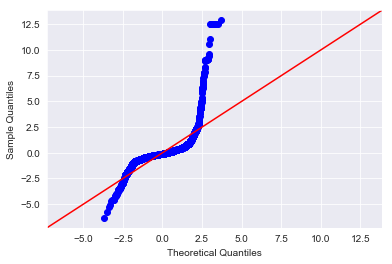

In [77]:
# Your code here - Check that the residuals are normally distributed
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Not very normal.  It may be normal-ish between -2.5 and 2.5 but as it gets closer to the extreme values, it gets less normal.

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

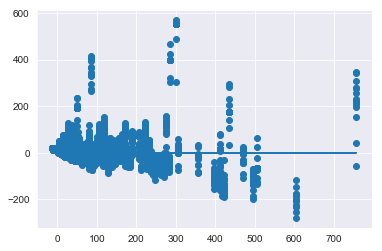

In [78]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[inf_predictors]), model.resid)
plt.plot(model.predict(train[inf_predictors]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [84]:
# Your code here - Check for outliers
q3=train.list_price.quantile(.75)
q1=train.list_price.quantile(.25)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
train = train[train.list_price < upper_limit]
train = train[train.list_price > lower_limit]
len(train)

7854

In [85]:
# Rerun the model
predictor_str = '+'.join(inf_predictors)
formula = target + '~' + predictor_str
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     5186.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:49:26   Log-Likelihood:                -33165.
No. Observations:                7854   AIC:                         6.634e+04
Df Residuals:                    7849   BIC:                         6.637e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           62.4699      0.231    269.936      0.000      62.016      62.924
piece_count         77.5420      0.569    136.364      0.000      76.427      78.657
num_reviews         -1.2841      0.297     -4.330      0.000      -1.865      -0.703
play_star_rating     3.6091      0.213     16.961      0.000       3.192       4.026
val_star_rating     -5.2265      0.213    -24.544      0.000      -5.644      -4.809
==============================================================================
Omnibus:                     2698.172   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15688.827
Skew:                           1.530   Prob(JB):                         0.00
Kurtosis:                       9.211   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

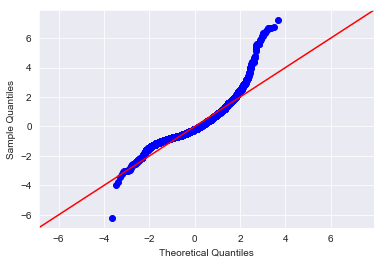

In [86]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

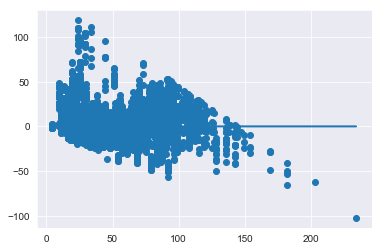

In [87]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[inf_predictors]), model.resid)
plt.plot(model.predict(train[inf_predictors]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 